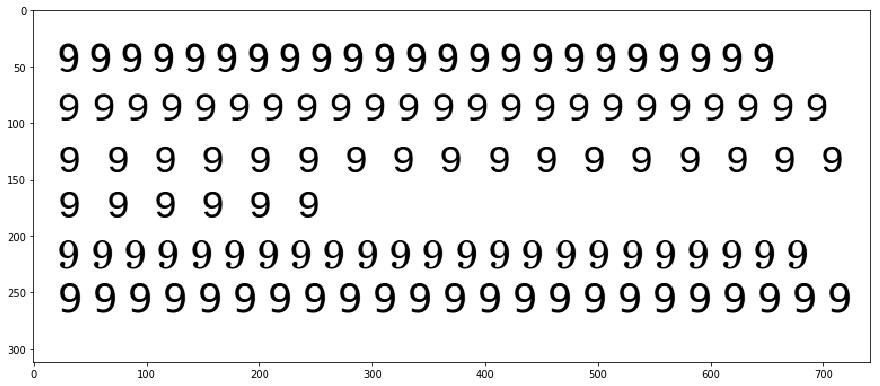

('Number of Dimension', 2)
Pixel value
[[ 0.          0.          0.23541647  0.97355569  1.        ]
 [ 0.          0.          0.00763412  0.65672392  0.9975    ]
 [ 0.          0.          0.          0.0056549   0.45567255]
 [ 0.20774745  0.          0.          0.          0.        ]
 [ 0.90954275  0.25629608  0.          0.          0.        ]]


In [262]:
from skimage import io
from matplotlib import pyplot as plt

# read image as a grayscale image
img_name = "image/digit-9.png"
image = io.imread(img_name, as_grey = True)
plt.figure(figsize=(15,10))
plt.imshow(image)
plt.show()

print("Number of Dimension", image.ndim)

print("Pixel value")
print image[40:45,25:30]

('Threshold value before normalization: ', 132)
('Threshold value after normalization: ', 0.51764705882352946)


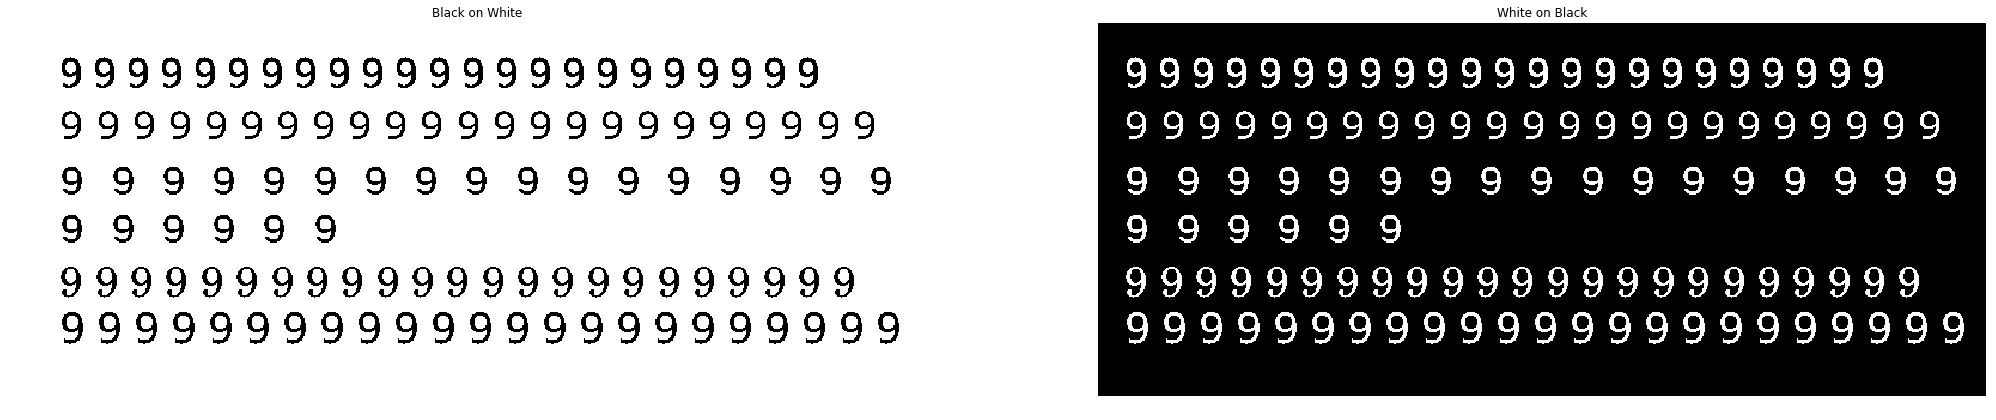

In [280]:
from matplotlib import pyplot as plt
from skimage.filters import threshold_otsu

# apply threshold
thresh = threshold_otsu(digit)
print("Threshold value before normalization: ",thresh)
thresh = thresh/255.0
print("Threshold value after normalization: ",thresh)

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(35,20))      
plt.gray()
axes[0].imshow(image > thresh)
axes[0].set_title('Black on White')
axes[1].imshow(image < thresh)
axes[1].set_title('White on Black')

for ax in axes:
    ax.axis('off')        
plt.show()

black_on_white = False
if black_on_white:
    bwimg = image > thresh
else:
    bwimg = image < thresh


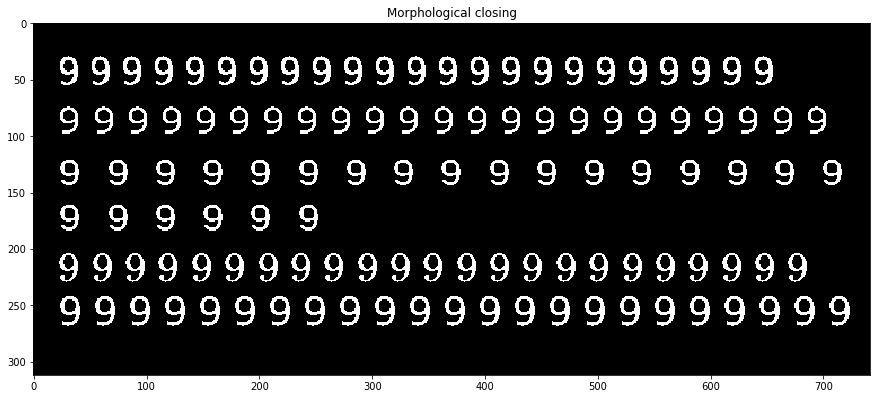

In [281]:
from skimage.morphology import closing, square

#Closing - Morphological closing on an image is defined as a dilation followed by an erosion. 
#Closing can remove small dark spots (i.e. “pepper”) and connect small bright cracks.

    # Dilation - Morphological dilation sets a pixel at (i, j) to the maximum over all pixels 
    #in the neighborhood centered at (i, j). Dilation enlarges bright regions and shrinks dark regions
    
    #Erosion - Morphological erosion sets a pixel at (i, j) to the minimum over all pixels in 
    #the neighborhood centered at (i, j). The structuring element, selem, passed to erosion is a boolean array 
    #that describes this neighborhood.
# uesful link: http://scikit-image.org/docs/dev/auto_examples/xx_applications/plot_morphology.html

closingpx=2
bw = closing(bwimg, square(closingpx))

plt.figure(figsize=(15,10))
plt.imshow(bw)
plt.title("Morphological closing")
plt.show()

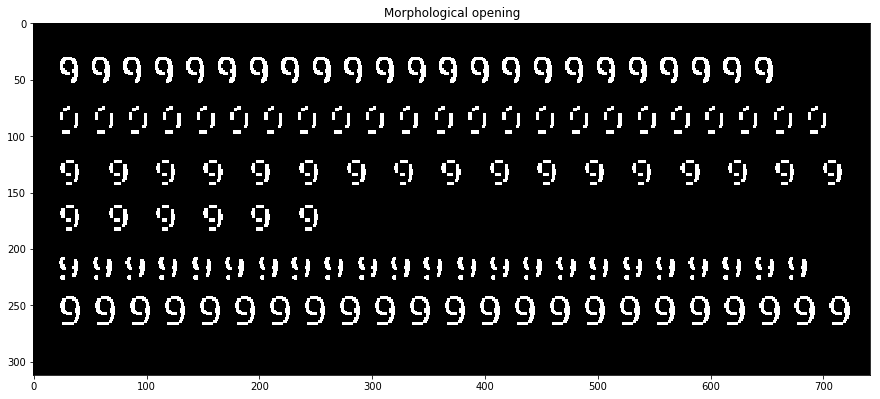

In [265]:
from skimage.morphology import opening, square

#Opening - Morphological opening on an image is defined as an erosion followed by a dilation.
openingpx=3
bw = opening(bwimg, square(openingpx))

plt.figure(figsize=(15,10))
plt.imshow(bw)
plt.title("Morphological opening")
plt.show()

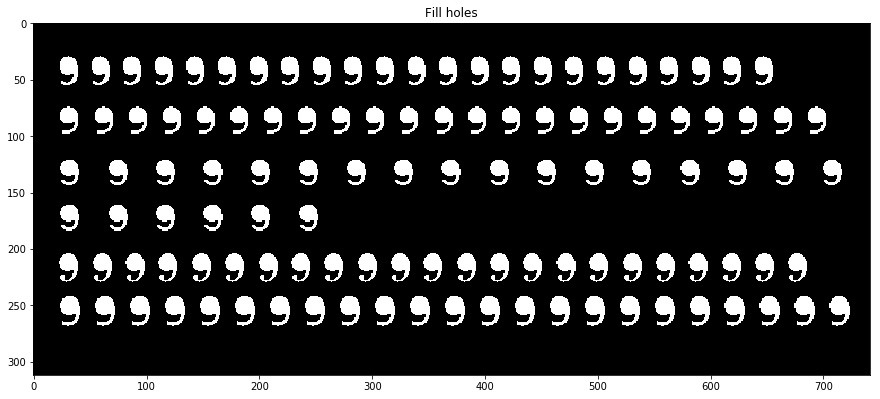

In [282]:
from scipy import ndimage

filled = ndimage.binary_fill_holes(bw)

plt.figure(figsize=(15,10))
plt.imshow(filled)
plt.title("Fill holes")
plt.show()

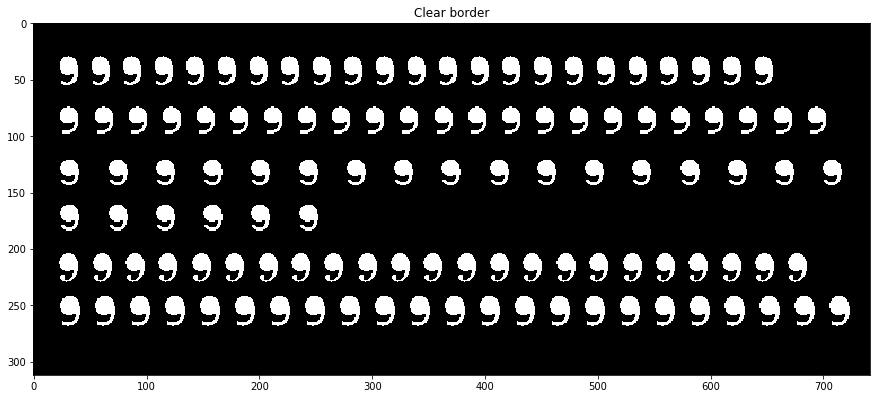

In [283]:
from skimage.segmentation import clear_border

# Clear objects connected to the label image border.
# link: http://scikit-image.org/docs/dev/api/skimage.segmentation.html?highlight=segment#skimage.segmentation.clear_border

# remove artifacts connected to image border
cleared = filled.copy()
clear_border(cleared)

plt.figure(figsize=(15,10))
plt.imshow(cleared)
plt.title("Clear border")
plt.show()

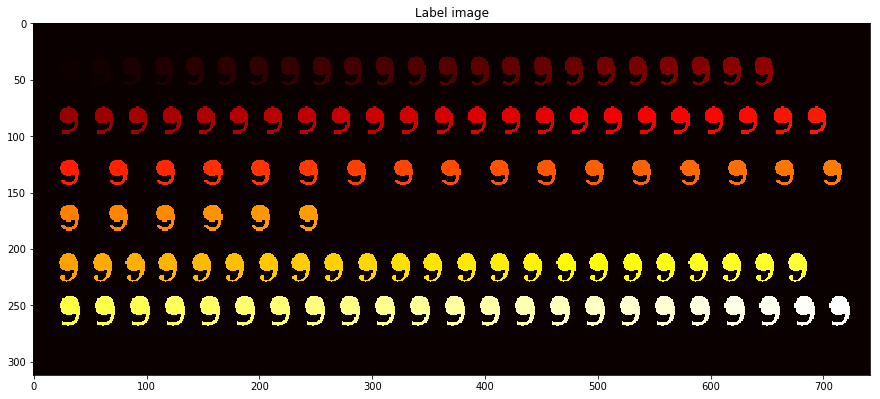

In [284]:
import numpy as np
from skimage.measure import label

# label image regions
label_image = label(cleared, background=None)

plt.figure(figsize=(15,10))
plt.imshow(label_image, cmap=plt.get_cmap('hot'))
plt.title("Label image")
plt.show()

# link: https://matplotlib.org/examples/color/colormaps_reference.html

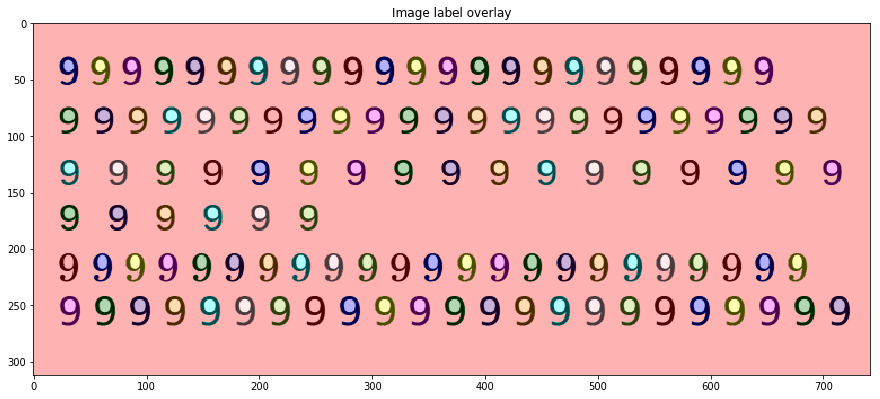

In [285]:
from skimage.color import label2rgb

borders = np.logical_xor(filled, cleared)
label_image[borders] = -1
image_label_overlay = label2rgb(label_image, image=image)

plt.figure(figsize=(15,10))
plt.imshow(image_label_overlay)
plt.title("Image label overlay")
plt.show()

In [286]:
from skimage.measure import regionprops

regions = regionprops(label_image)

print("type of regions", type(regions))
print("number of regions", len(regions))
print("\n")

# Region properties
obj = 80
print("Region Properties of object no. {}\n=================".format(obj))
print("Centroid", regions[obj].centroid)
print("Orientation", regions[obj].orientation)
print("Location", regions[obj].bbox)   #bbox = 'BoundingBox'
minr, minc, maxr, maxc = regions[obj].bbox
print("Area", regions[obj].area)

('type of regions', <type 'list'>)
('number of regions', 115)


Region Properties of object no. 80
('Centroid', (214.45756457564576, 354.29151291512915))
('Orientation', -1.5666975480000287)
('Location', (204L, 346L, 230L, 363L))
('Area', 271)


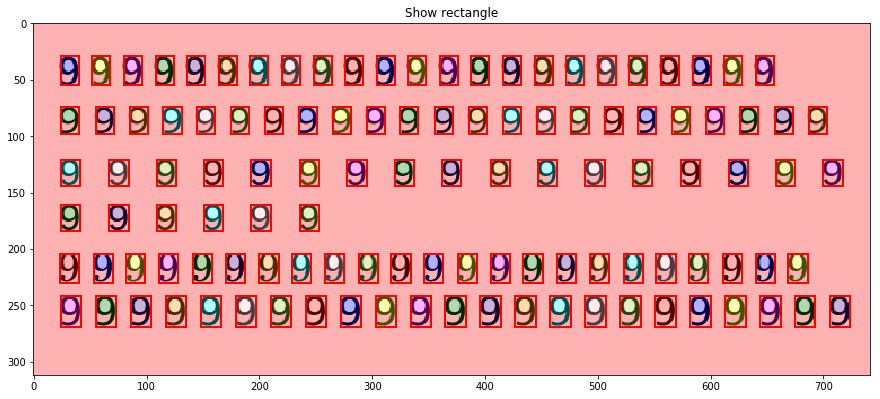

In [287]:
import matplotlib.patches as mpatches

show = True

if show:
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15, 10))
    ax.imshow(image_label_overlay)

    
skip_small_region = False
small_region = 250

for item, region in enumerate(regions):
    if skip_small_region:
        # skip small elements
        if region['Area'] < small_region:
            continue            
    # draw rectangle around segmented digits
    #minr, minc, maxr, maxc = region['BoundingBox']
    minr, minc, maxr, maxc = regions[item].bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr, 
                              fill=False, edgecolor='red', linewidth=2)
    if show:
        ax.add_patch(rect)

if show:    
    plt.title("Show rectangle")
    plt.show()

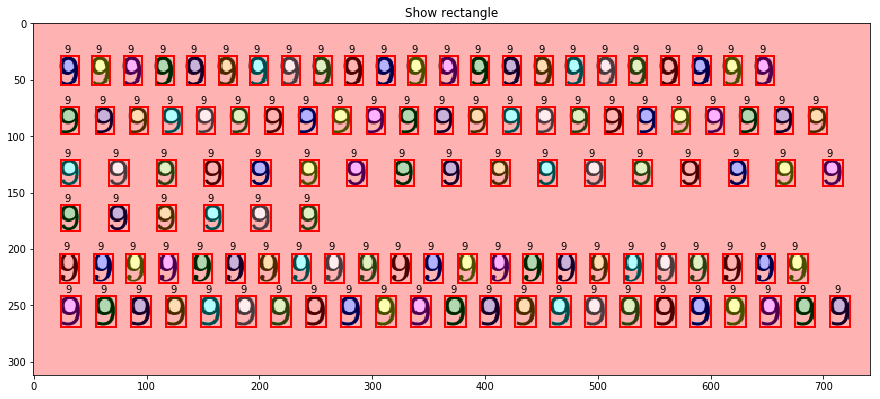

In [334]:
import matplotlib.patches as mpatches

class_name = img_name.split("-")[-1].split(".")[0]

show = True

if show:
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15, 10))
    ax.imshow(image_label_overlay)

    
skip_small_region = True
small_region = 200

for item, region in enumerate(regions):
    if skip_small_region:
        # skip small elements
        if region['Area'] < small_region:
            continue            
    # draw rectangle around segmented digits
    #minr, minc, maxr, maxc = region['BoundingBox']
    minr, minc, maxr, maxc = regions[item].bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr, 
                              fill=False, edgecolor='red', linewidth=2)
    if show:
        ax.annotate(class_name, xy=(((int(maxc)+int(minc))/2)-5,minr-3))
        ax.add_patch(rect)        
        
if show:    
    plt.title("Show rectangle")
    plt.show()

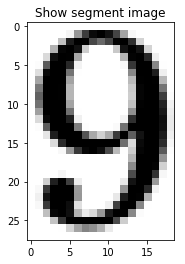

In [335]:
obj = 80
minr, minc, maxr, maxc = regions[obj].bbox

plt.imshow(image[int(minr)-1:int(maxr)+1, int(minc)-1:int(maxc)+1])
plt.title("Show segment image")
plt.show()

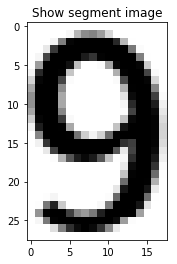

In [336]:
obj = 0
minr, minc, maxr, maxc = regions[obj].bbox

plt.imshow(image[int(minr)-1:int(maxr)+1, int(minc)-1:int(maxc)+1])
plt.title("Show segment image")
plt.show()

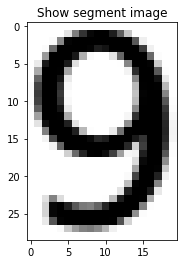

In [337]:
obj = 100
minr, minc, maxr, maxc = regions[obj].bbox

plt.imshow(image[int(minr)-1:int(maxr)+1, int(minc)-1:int(maxc)+1])
plt.title("Show segment image")
plt.show()